(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

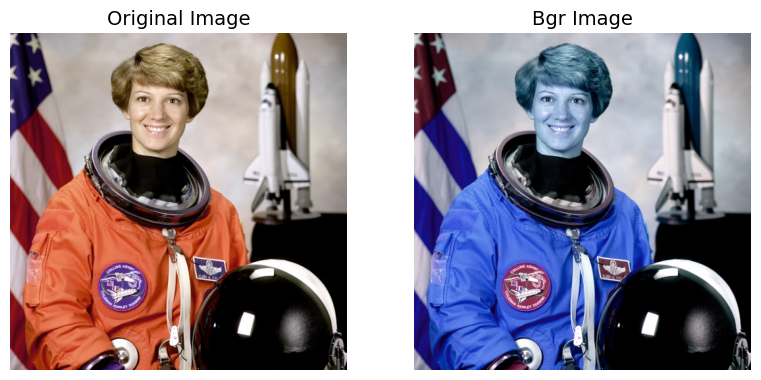

In [51]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import data, color, img_as_float

original_rgb = data.astronaut()
original_rgb = img_as_float(original_rgb)

plt.figure(figsize=(20, 8))  

plt.subplot(1, 4, 1)
plt.imshow(original_rgb)
plt.title('Original Image', fontsize=14)
plt.axis('off')

rgb = (original_rgb * 255).astype(np.uint8)
bgr_image = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)

plt.subplot(1, 4, 2)
plt.imshow(bgr_image)
plt.title('Bgr Image', fontsize=14)
plt.axis('off')

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

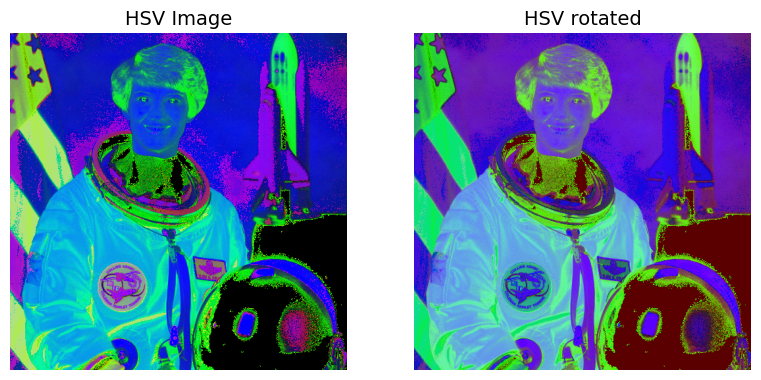

In [ ]:
hsv_img = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)
plt.figure(figsize=(20, 8)) 

plt.subplot(1, 4, 1)
plt.imshow(hsv_img)
plt.title('HSV Image', fontsize=14)
plt.axis('off')

def hue_rotate_180(hsv_img):
    hsv_new = hsv_img.copy()
    hsv_new[:, :, 0] = (hsv_new[:, :, 0] + 90) % 180
    return hsv_new

hsv_rotated = hue_rotate_180(hsv_img)

plt.subplot(1, 4, 2)
plt.imshow(hsv_rotated)
plt.title('HSV rotated', fontsize=14)
plt.axis('off')


In [ ]:

def encrypt_image(img, seed=1234):
    h, w = img.shape[:2]

    np.random.seed(seed)
    row_perm = np.random.permutation(h)
    col_perm = np.random.permutation(w)

    scrambled = img[row_perm, :]
    scrambled = scrambled[:, col_perm]

    size = h * w

    if img.ndim == 3:
        xor_key = np.random.randint(0, 256, size * img.shape[2], dtype=np.uint8)
        xor_key = xor_key.reshape(h, w, img.shape[2])
    else:
        xor_key = np.random.randint(0, 256, size, dtype=np.uint8).reshape(h, w)

    encrypted_img = (scrambled ^ xor_key)

    return encrypted_img, (row_perm, col_perm), xor_key

encrypted_img, keys, xor_key = encrypt_image(hsv_rotated, seed=111)


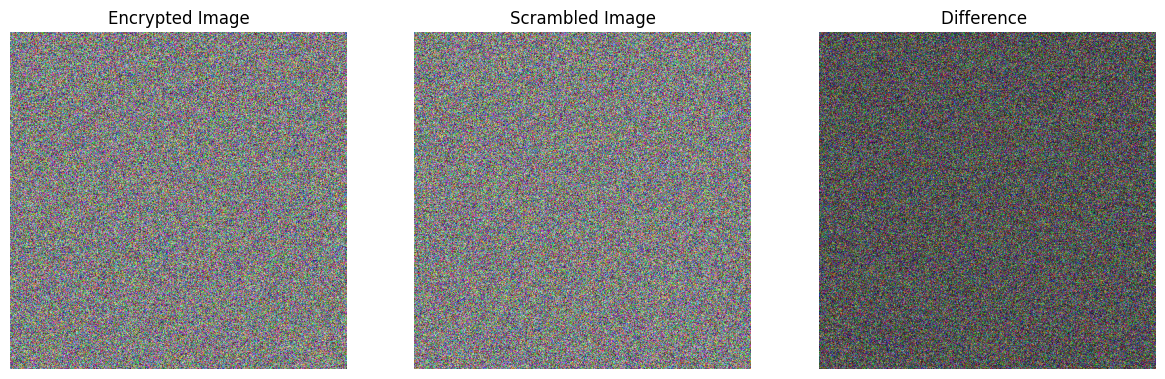

In [ ]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

def scrambling(key, angle_deg=75):
    shuffled = key.copy()
    n = len(shuffled)
    angle_rad = math.radians(angle_deg)

    shuffle_sequence = []
    for i in range(n):
        base_i = i % 256
        r = ((base_i ** 2) * math.sin(2 * angle_rad)) / 9.8
        rpixel = (int(abs(r)) ^ (255 - base_i)) % 255
        shuffle_sequence.append(rpixel)

    for i in range(n):
        j = shuffle_sequence[i] % 255
        shuffled[i], shuffled[j] = shuffled[j], shuffled[i]

    return shuffled, shuffle_sequence

def scramble_image(img):
    if img is None:
        raise ValueError("Input image is None")

    h, w, c = img.shape
    key = img.flatten()
    scrambled_key, seq = scrambling(key, angle_deg=75)
    scrambled_img = np.reshape(scrambled_key, (h, w, c))

    return img, scrambled_img.astype(np.uint8)

orig, scrambled = scramble_image(encrypted_img)


difference = cv2.absdiff(orig, scrambled)

plt.figure(figsize=(20, 8))
plt.subplot(1, 4, 1)
plt.title("Encrypted Image")
plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Scrambled Image")
plt.imshow(cv2.cvtColor(scrambled, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Difference ")
plt.imshow(cv2.cvtColor(difference, cv2.COLOR_BGR2RGB))
plt.axis("off")


plt.show()


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

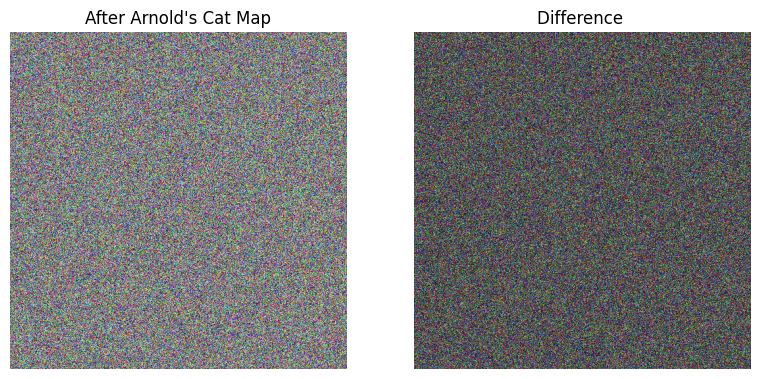

In [47]:
def arnold_cat_map(img, iterations=1):
    h, w, c = img.shape
    if h != w:
        raise ValueError("Arnold's cat map requires a square image")

    N = h
    output = img.copy()

    for _ in range(iterations):
        new_img = np.zeros_like(output)
        for x in range(N):
            for y in range(N):
                new_x = (x + y) % N
                new_y = (x + 2*y) % N
                new_img[new_x, new_y] = output[x, y]
        output = new_img

    return output

arnold_scrambled = arnold_cat_map(scrambled, iterations=5)

difference = cv2.absdiff(scrambled,arnold_scrambled)

plt.figure(figsize=(20, 8))
plt.subplot(1, 4, 1)
plt.title("After Arnold's Cat Map")
plt.imshow(cv2.cvtColor(arnold_scrambled, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Difference ")
plt.imshow(cv2.cvtColor(difference, cv2.COLOR_BGR2RGB))
plt.axis("off")


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

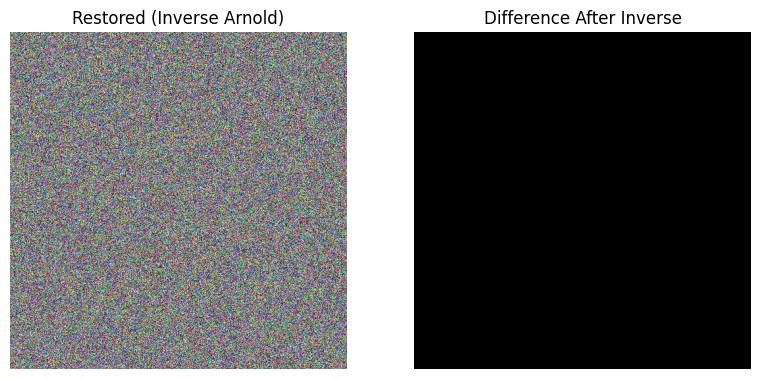

In [61]:
def inverse_arnold_cat_map(img, iterations=1):
    h, w, c = img.shape
    if h != w:
        raise ValueError("Arnold's cat map requires a square image")

    N = h
    output = img.copy()

    for _ in range(iterations):
        new_img = np.zeros_like(output)
        for x in range(N):
            for y in range(N):
                old_x = (2*x - y) % N
                old_y = (-x + y) % N
                new_img[old_x, old_y] = output[x, y]
        output = new_img

    return output


restored_arnold = inverse_arnold_cat_map(arnold_scrambled, iterations=5)

# Check recovery
difference2 = cv2.absdiff(scrambled, restored_arnold)

plt.figure(figsize=(20, 8))
plt.subplot(1, 4, 1)
plt.title("Restored (Inverse Arnold)")
plt.imshow(cv2.cvtColor(restored_arnold, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Difference After Inverse")
plt.imshow(cv2.cvtColor(difference2, cv2.COLOR_BGR2RGB))
plt.axis("off")


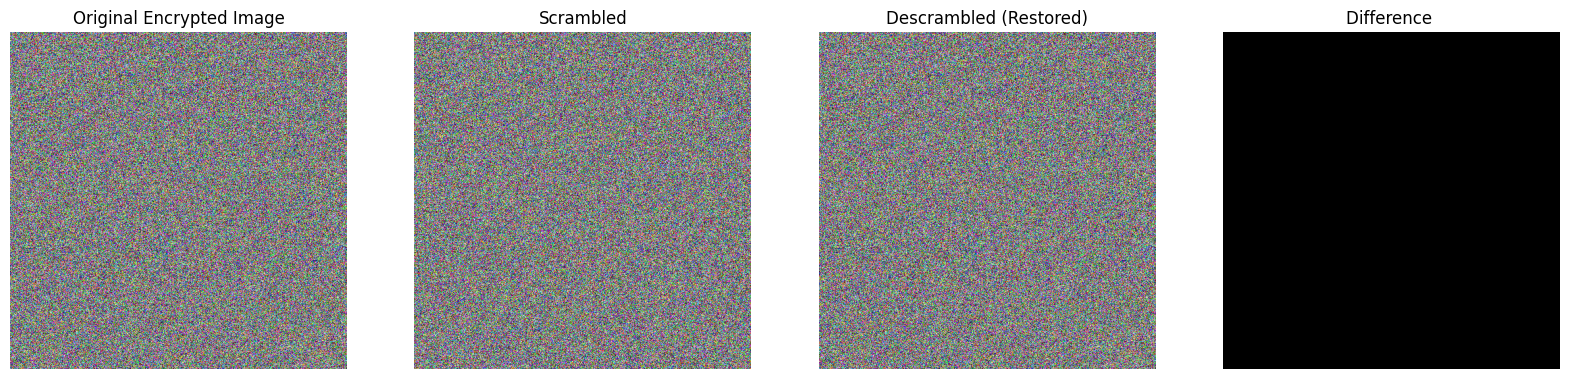

In [58]:
def descrambling(scrambled_key, shuffle_sequence):
    unshuffled = scrambled_key.copy()
    n = len(unshuffled)

    # reverse the swap operations
    for i in range(n - 1, -1, -1):
        j = shuffle_sequence[i] % 255
        unshuffled[i], unshuffled[j] = unshuffled[j], unshuffled[i]

    return unshuffled

def descramble_image(scrambled_img, shuffle_sequence):
    h, w, c = scrambled_img.shape
    scrambled_key = scrambled_img.flatten()

    restored_key = descrambling(scrambled_key, shuffle_sequence)
    restored_img = np.reshape(restored_key, (h, w, c))

    return restored_img.astype(np.uint8)

key = encrypted_img.flatten()
scrambled_key, seq = scrambling(key, angle_deg=75)
scrambled_img = scrambled_key.reshape(encrypted_img.shape).astype(np.uint8)

# descramble
restored_img = descramble_image(restored_arnold, seq)

difference = cv2.absdiff(orig, restored_img)

plt.figure(figsize=(20, 6))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(encrypted_img, cv2.COLOR_BGR2RGB))
plt.title("Original Encrypted Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(scrambled_img, cv2.COLOR_BGR2RGB))
plt.title("Scrambled")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(restored_img, cv2.COLOR_BGR2RGB))
plt.title("Descrambled (Restored)")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("Difference ")
plt.imshow(cv2.cvtColor(difference, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()

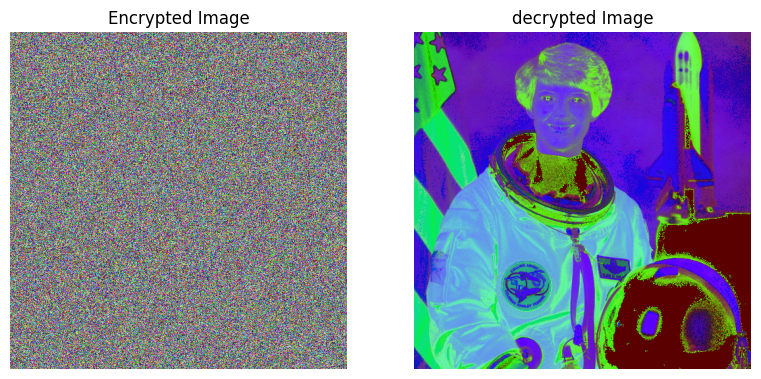

In [59]:
# -------------------------------------------------------
# 2. Row–Column Inverse + XOR DECRYPTION
# -------------------------------------------------------
def decrypt_image(encrypted, keys, xor_key):
    """
    encrypted: encrypted image (2D or 3D uint8)
    keys: (row_perm, col_perm)
    xor_key: key-stream used during encryption
    """
    row_perm, col_perm = keys
    h, w = encrypted.shape[:2]

    # ------------------------------
    # A. Undo XOR
    # ------------------------------
    unxored = (encrypted ^ xor_key)

    # ------------------------------
    # B. Inverse row/column scramble
    # ------------------------------
    # Make empty container
    descrambled = np.zeros_like(unxored)

    # Inverse row permutation
    descrambled[row_perm, :] = unxored
    # Inverse column permutation
    descrambled[:, col_perm] = descrambled[:, :]

    return descrambled

decrypt_img=decrypt_image(restored_img,keys,xor_key)

plt.figure(figsize=(20, 8)) 

plt.subplot(1, 4, 1)
plt.imshow(encrypted_img)
plt.title("Encrypted Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(decrypt_img)
plt.title("decrypted Image")
plt.axis("off")
plt.show()

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

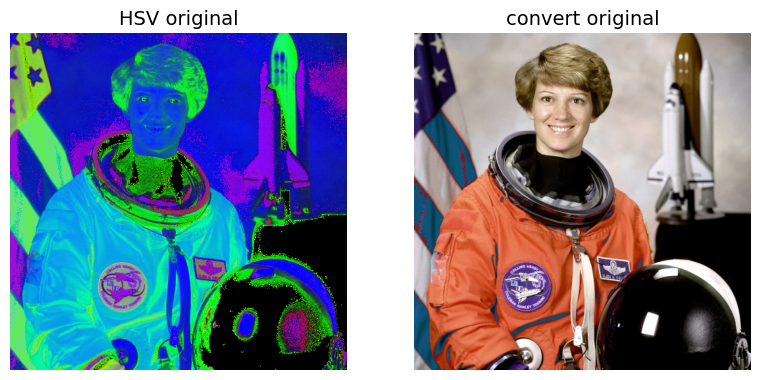

In [60]:
def hue_inverse_180(hsv_img):
    hsv_new = hsv_img.copy()
    hsv_new[:, :, 0] = (hsv_new[:, :, 0] + 90) % 180
    return hsv_new

hsv_original = hue_inverse_180(decrypt_img)

plt.figure(figsize=(20, 8)) 
plt.subplot(1, 4, 1)
plt.imshow(hsv_original)
plt.title('HSV original', fontsize=14)
plt.axis('off')

decrypt_rgb=cv2.cvtColor(hsv_original, cv2.COLOR_HSV2RGB)
plt.subplot(1, 4, 2)
plt.imshow(decrypt_rgb)
plt.title('convert original', fontsize=14)
plt.axis('off')
